In [2]:
library(ggplot2)
library(Hmisc)

# Exercise 1 #

•a well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease.

•A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of n = 75 patients known to have the disease is screened using the new
method.

(a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ?

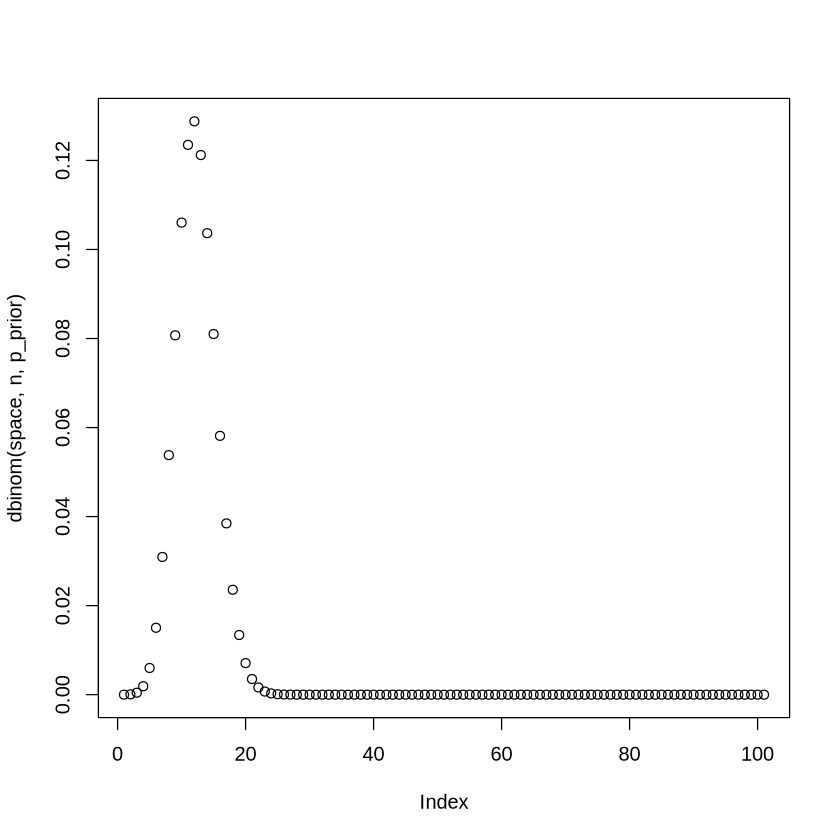

In [8]:
p_prior = 0.15

n = 75

space = seq(0, 100, 1)

plot(dbinom(space, n, p_prior))


b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ?

In [9]:
print(paste("The frequentist estimator of the failure probability for the new method is p =", 6 / 75))

[1] "The frequentist estimator of the failure probability for the new method is p = 0.08"


c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance

For the beta distribution, if $\mu$ is the mean and $\nu$ is the variance:
$$ \alpha = \mu \nu$$
and the variance:
$$ \beta = (1 - \mu)\nu $$ 

[1] 0.08034773


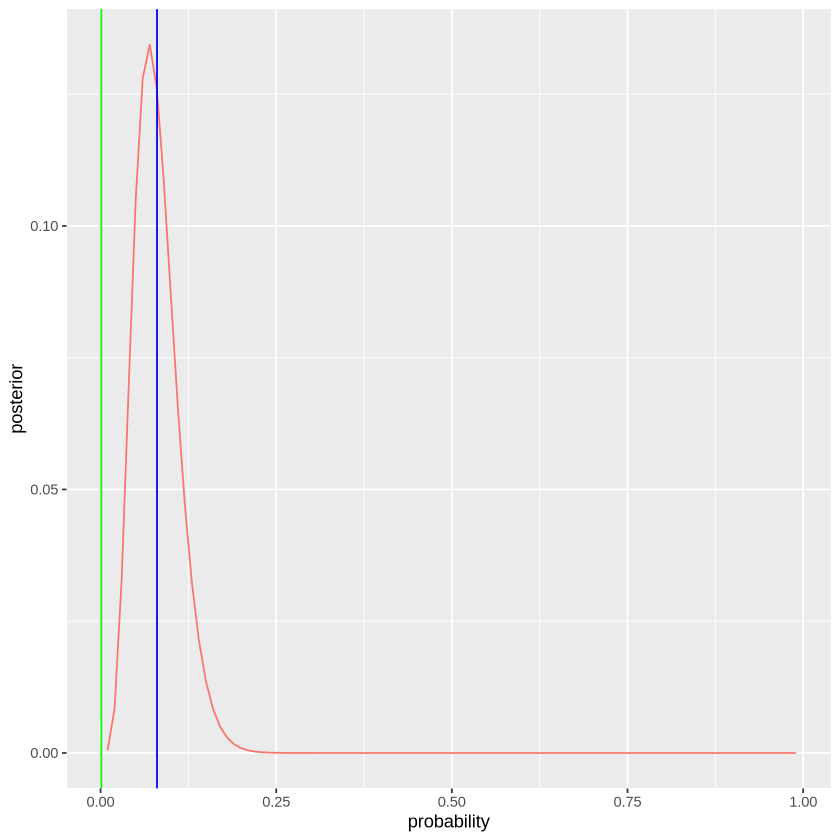

In [14]:
space = seq(0.01, 0.99, 0.01)

alpha = 0.15 * sqrt(0.14)
beta = (1 - 0.15) * sqrt(0.14)

likelihood = dbinom(6, 75, space)

prior = dbeta(space, alpha, beta)

posterior = likelihood * prior

posterior = posterior / sum(posterior)

mean = wtd.mean(space, posterior, normwt = TRUE)
var = wtd.var(space, posterior, normwt = TRUE)

df = data.frame(probability = space, posterior = posterior)

ggplot(df, aes(x = probability, y = posterior )) + 
    geom_line(aes(color = 'red'), show.legend = FALSE) +
    geom_vline(xintercept = mean, color = 'blue') +
    geom_vline(xintercept = var, color = 'green')

(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way

In [17]:
alpha_post = alpha + 6
beta_post = beta + 75 - 6

prob = 1 - pbeta(0.15, alpha_post, beta_post)

print(paste("The probability that the failure probability of the new method is less than 0.15 is", prob, "and therefore the new method is not acceptable."))


[1] "The probability that the failure probability of the new method is less than 0.15 is 0.0261264733066097 and therefore the new method is not acceptable."


(e) Perform the same hypothesis test in the classical frequentist way.

In [19]:
old_mean = 0.15 * 75
new_mean = mean * 75
new_std = sqrt(var) * 75

z = new_mean - old_mean / (new_std) * sqrt(75)